In [13]:
# Hi there! Before we dive into the analysis, we need to import the necessary libraries.
# These will help us with data manipulation, visualization, and other important tasks.

import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced plotting with better aesthetics
import plotly.express as px  # For interactive plotting
import plotly.graph_objects as go  # For more complex interactive plotting
import plotly.offline as pyo  # To use plotly in offline mode
import plotly.io as pio  # To control the rendering of plotly plots
import warnings  # To suppress unnecessary warnings

# To make sure our notebook looks clean, let's ignore warnings.
warnings.filterwarnings('ignore')

# Now, let's load our dataset. Since your .ipynb file and the dataset are in the same folder,
# we'll simply refer to it by its name.
df = pd.read_csv('dataset.csv')

# Let's take a quick look at the first few rows of our data to get a feel for what's inside.
df.head()


,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [14]:
# Before we start any serious analysis, it's important to understand the structure of our data.
# I'll define a summary function that will give us a comprehensive overview of our dataset.

def summary(df):
    print(f'Data shape: {df.shape}')  # This tells us the dimensions of the dataset (rows, columns)
    
    # Creating a summary DataFrame that will include information like data types, missing values, etc.
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing Count'] = df.isna().sum()  # How many missing values each column has
    summ['Missing Percentage'] = (df.isna().sum()) / len(df)  # Percentage of missing values
    summ['Duplicates'] = df.duplicated().sum()  # Number of duplicated rows in the entire DataFrame
    summ['Unique Values'] = df.nunique().values  # Number of unique values in each column
    summ['Count'] = df.count().values  # Number of non-missing values in each column
    
    # We also want to know some statistical details about our data.
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Std Dev'] = desc['std'].values
    
    # Let's grab a few example values from the first rows to get a better sense of the data.
    summ['1st Value'] = df.loc[0].values
    summ['2nd Value'] = df.loc[1].values
    summ['3rd Value'] = df.loc[2].values

    # Display the summary DataFrame
    display(summ)

# Let's run the summary function to get an overview of our dataset.
summary(df)


Data shape: (3065, 17)


,Data Type,Missing Count,Missing Percentage,Duplicates,Unique Values,Count,Min,Max,Average,Std Dev,1st Value,2nd Value,3rd Value
Year,int64,0,0.0,0,52,3065,1973.0,2024.0,1998.042414,14.747378,1973,1973,1973
Month,int64,0,0.0,0,12,3065,1.0,12.0,6.491028,3.456934,1,1,1
Sector,object,0,0.0,0,5,3065,NaN,NaN,NaN,NaN,Commerical,Electric Power,Industrial
Hydroelectric Power,float64,0,0.0,0,509,3065,-0.002,2.047,0.169759,0.373819,0.0,0.0,1.04
Geothermal Energy,float64,0,0.0,0,750,3065,0.0,5.951,1.146369,1.550857,0.0,0.49,0.0
Solar Energy,float64,0,0.0,0,1054,3065,0.0,64.04,2.015008,5.774511,0.0,0.0,0.0
Wind Energy,float64,0,0.0,0,473,3065,0.0,157.409,4.282404,18.124793,0.0,0.0,0.0
Wood Energy,float64,0,0.0,0,1606,3065,0.0,183.628,36.644408,46.900639,0.57,0.054,98.933
Waste Energy,float64,0,0.0,0,1381,3065,0.0,32.875,5.820124,8.247359,0.0,0.157,0.0
"Fuel Ethanol, Excluding Denaturant",float64,0,0.0,0,939,3065,0.0,104.42,6.976648,21.91192,0.0,0.0,0.0


In [15]:
# We noticed that the data for the year 2024 is incomplete.
# To make sure our analysis is accurate, let's remove any rows that contain data from 2024.

df = df[df['Year'] != 2024]

# Now, our dataset should be cleaner and ready for analysis!


In [16]:
# We're going to analyze the consumption of different energy types across various sectors.
# Let's first define which columns we'll focus on and assign some colors for our plots.

cols = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
        'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
        'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']

# The sectors we'll be looking at are:
sectors = ['Commerical', 'Electric Power', 'Industrial', 'Residential', 'Transportation']

# I've selected a different color scheme to make our plots visually distinct.
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # A set of visually pleasing colors


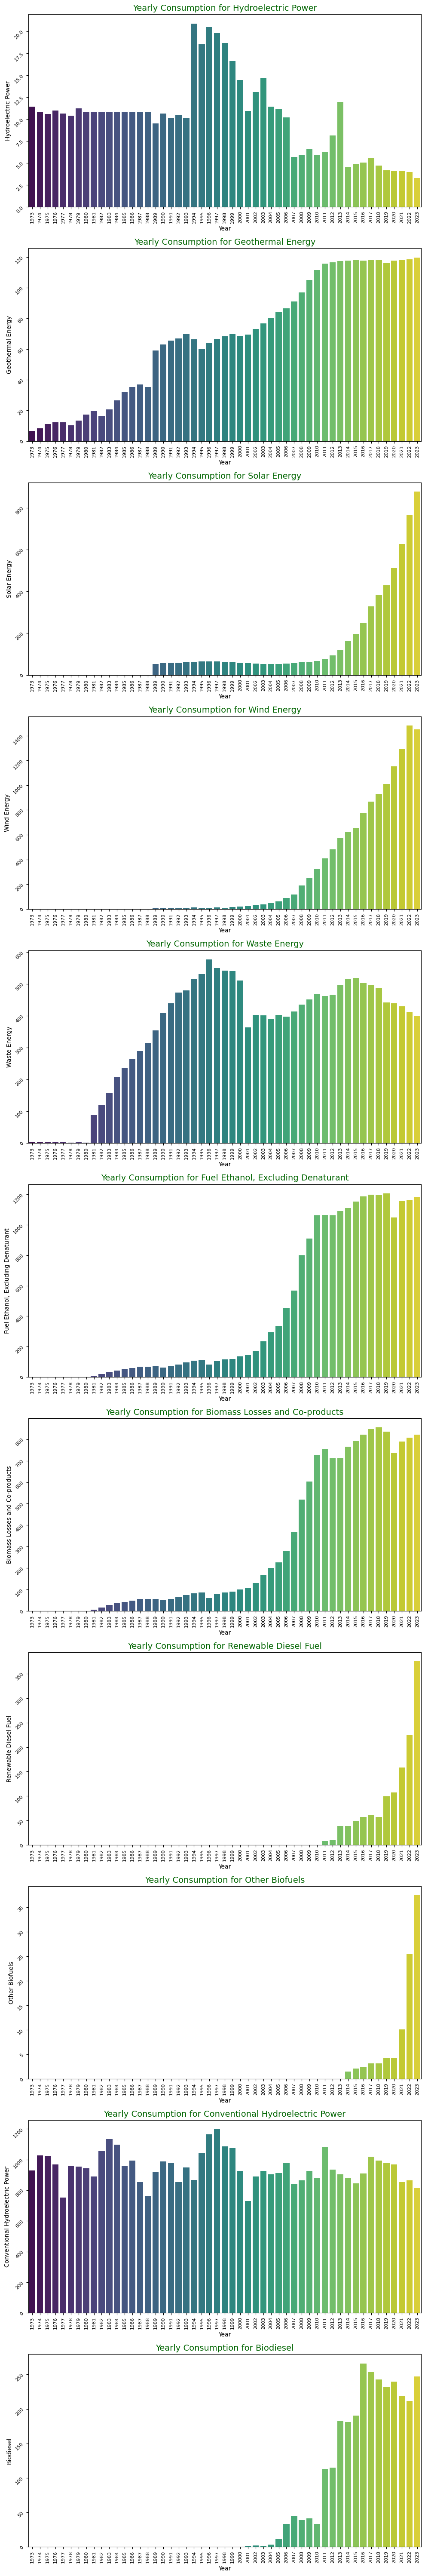

In [17]:
# Now, let's visualize the energy consumption per year for each type of energy.
# This will give us a clear idea of how the usage of different energy types has evolved over time.

fig, axes = plt.subplots(len(cols), 1, figsize=(10, 60))  # I'm adjusting the figure size to fit all plots

# We'll loop through each energy type and create a bar plot for each.
for ind, col in enumerate(cols):
    plt.subplot(len(cols), 1, ind + 1)
    df_top = df.groupby(['Year'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False)
    
    # Using the 'viridis' palette this time for a different look.
    sns.barplot(x=df_top["Year"], y=df_top[col], palette="viridis")
    plt.yticks(rotation=45, fontsize=8)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f"Yearly Consumption for {col}", fontsize=14, color='darkgreen')

plt.tight_layout()  # Adjusts the layout so everything fits nicely.
plt.show()

# This set of plots will show us how the consumption of each type of energy has changed over the years.


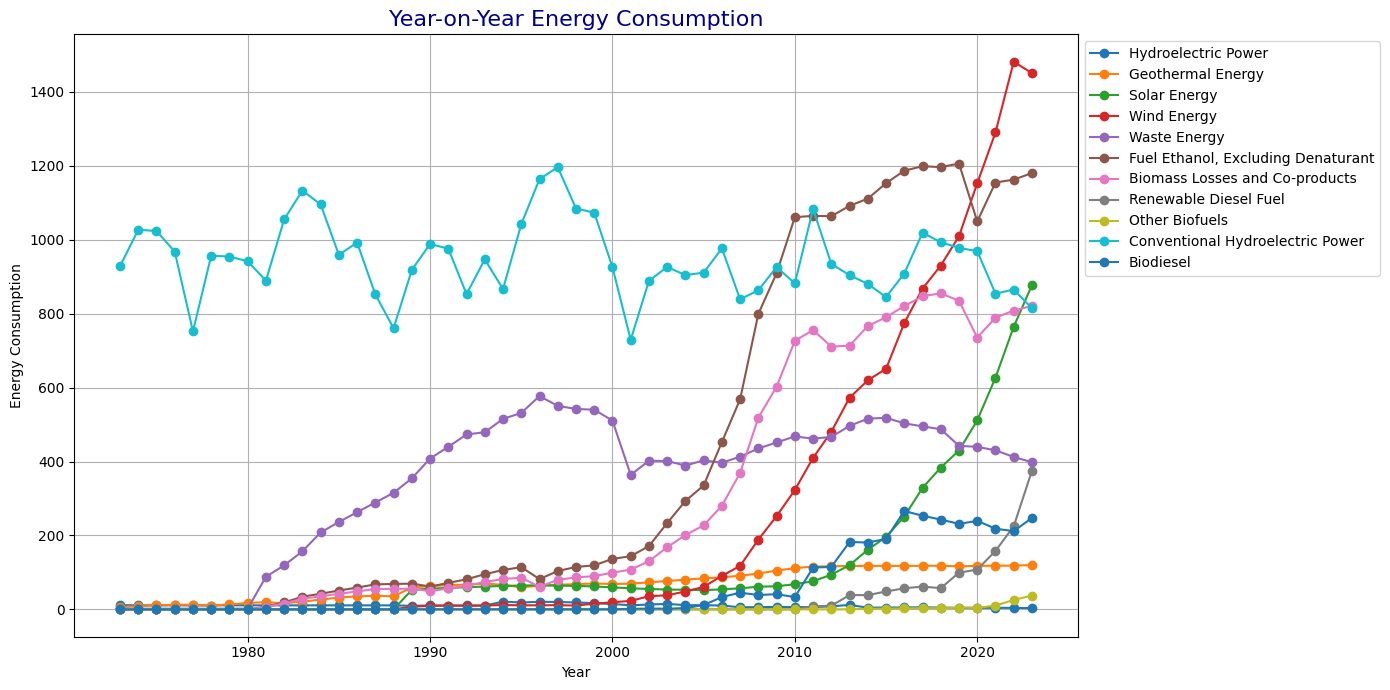

In [18]:
# Let's take a broader look at how the consumption of different types of energy has changed year by year.
# This will help us see trends and compare the usage of various energy sources.

df_year = df.groupby('Year').sum().reset_index().drop(columns=['Month', 'Sector'])

plt.figure(figsize=(14, 7))  # Adjusted figure size for a clearer view
for energy_type in cols:
    plt.plot(df_year['Year'], df_year[energy_type], label=energy_type, marker='o')  # Adding markers for better visibility

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Year-on-Year Energy Consumption', fontsize=16, color='darkblue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legend outside the plot for clarity
plt.grid(True)  # Grid helps in better reading of the plot
plt.tight_layout()
plt.show()

# This line plot will show us how the consumption of each type of energy has trended over the years.


<Figure size 1200x700 with 0 Axes>

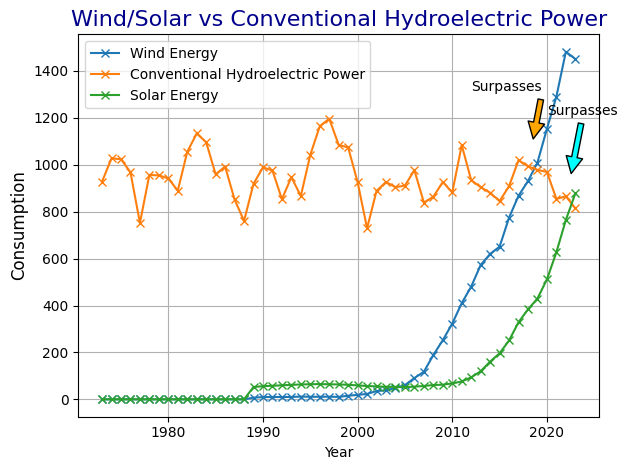

In [19]:
# It's interesting to compare the consumption of wind and solar energy with conventional hydroelectric power.
# This plot will help us see if and when wind and solar energy consumption surpassed hydroelectric power.

df_year = df.groupby('Year').sum().reset_index().drop(columns=['Month', 'Sector'])

plt.figure(figsize=(12, 7))
df_year.plot(x="Year", y=['Wind Energy', 'Conventional Hydroelectric Power', 'Solar Energy'], kind="line", marker='x')
plt.title("Wind/Solar vs Conventional Hydroelectric Power", fontsize=16, color='darkblue')
plt.ylabel('Consumption', rotation=90, fontsize=12)

# Adding annotations to highlight key moments where one energy source surpassed another.
plt.annotate('Surpasses',
             horizontalalignment='left',
             verticalalignment='bottom',
             xytext=(2012, 1300),
             xy=(2018.5, 1100),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.annotate('Surpasses',
             horizontalalignment='left',
             verticalalignment='bottom',
             xytext=(2020, 1200),
             xy=(2022.5, 950),
             arrowprops=dict(facecolor='cyan', shrink=0.05))
plt.grid(True)
plt.tight_layout()
plt.show()

# This plot will help us see the moment when wind and solar energy started to take over from conventional hydroelectric power.


In [22]:
# Let's take a closer look at which sectors consume the most of each type of energy.
# This will give us insights into which industries rely more on specific energy sources.

for i in cols:
    if i == 'Hydroelectric Power':
        df_top = df.groupby(['Sector'])[['Hydroelectric Power']].sum()
        df_top = df_top.sort_values(by="Hydroelectric Power", ascending=False).head(10)

        # Creating an interactive bar chart to show the top sectors for hydroelectric power consumption.
        fig = px.bar(df_top,
                     text_auto=True,
                     color=df_top.index,
                     color_discrete_sequence=colors,
                     labels={'index': "Sector", 'value': "Consumption"},
                     title='Top Sectors for Hydroelectric Power Consumption')
        fig.show()  # Displaying the plot
    else:
        df_top = df.groupby(['Sector'])[[i]].sum()
        df_top = df_top.sort_values(by=i, ascending=False).head(5)

        # Interactive bar chart for other energy types.
        fig = px.bar(df_top,
                     text_auto=True,
                     color=df_top.index,
                     color_discrete_sequence=colors,
                     labels={'index': "Sector", 'value': "Consumption"},
                     title=f'Top Sectors for {i} Consumption')
        fig.show()  # Displaying the plot


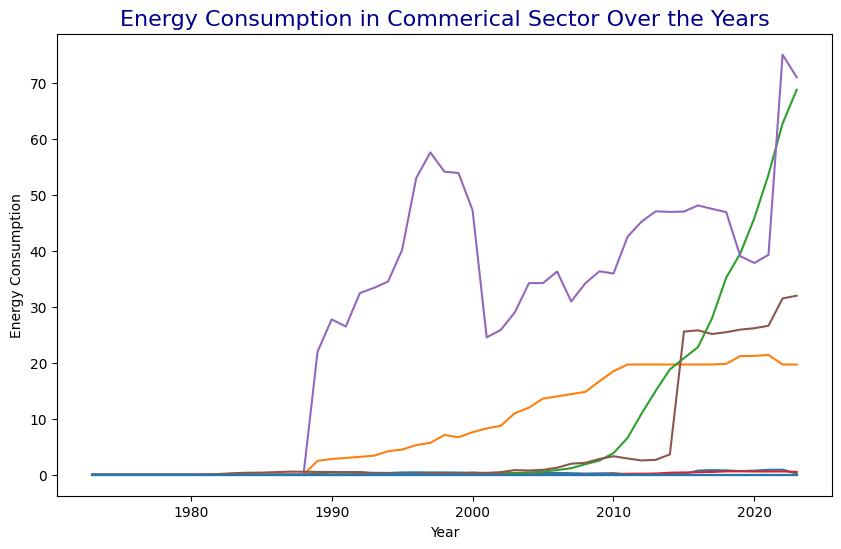

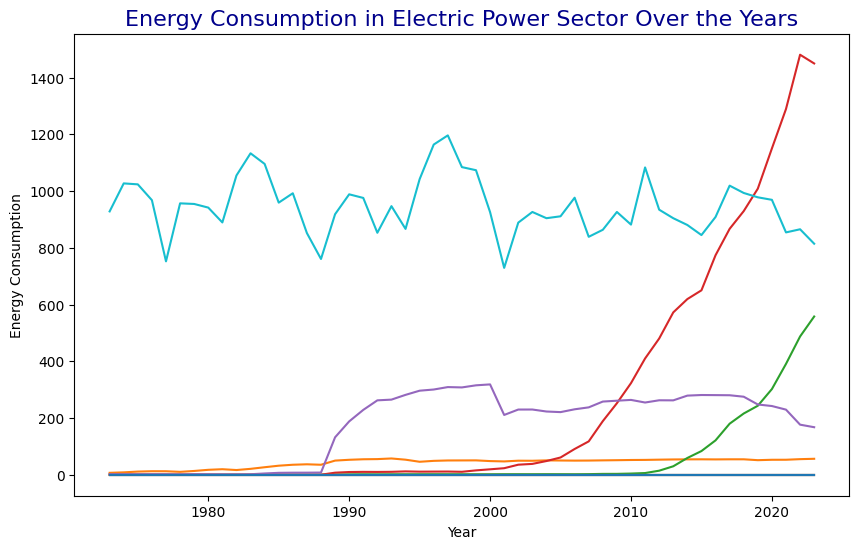

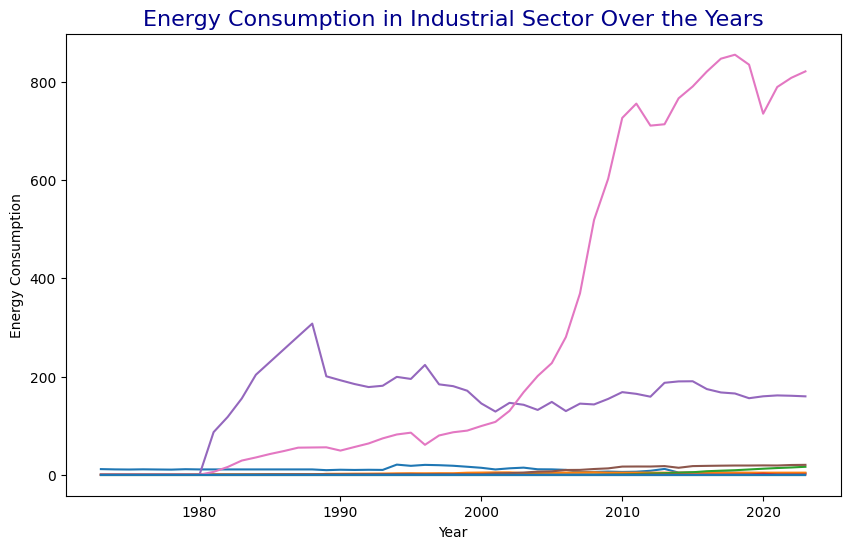

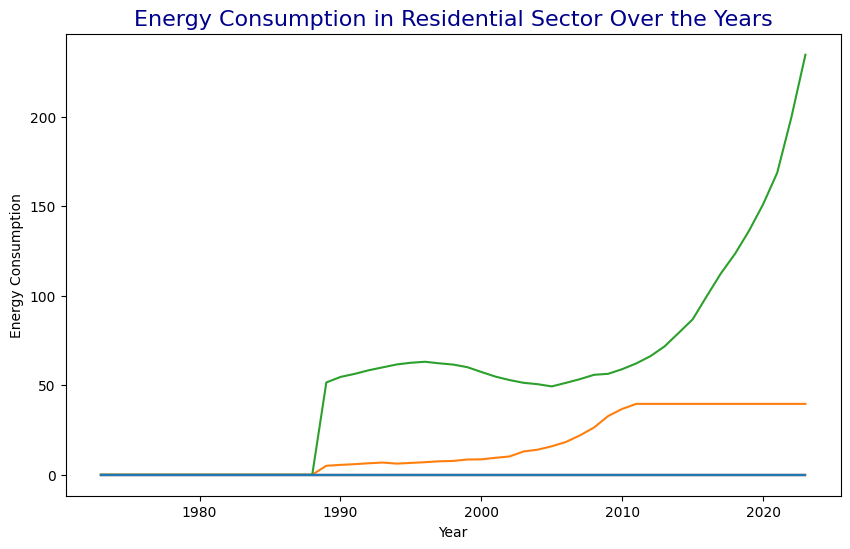

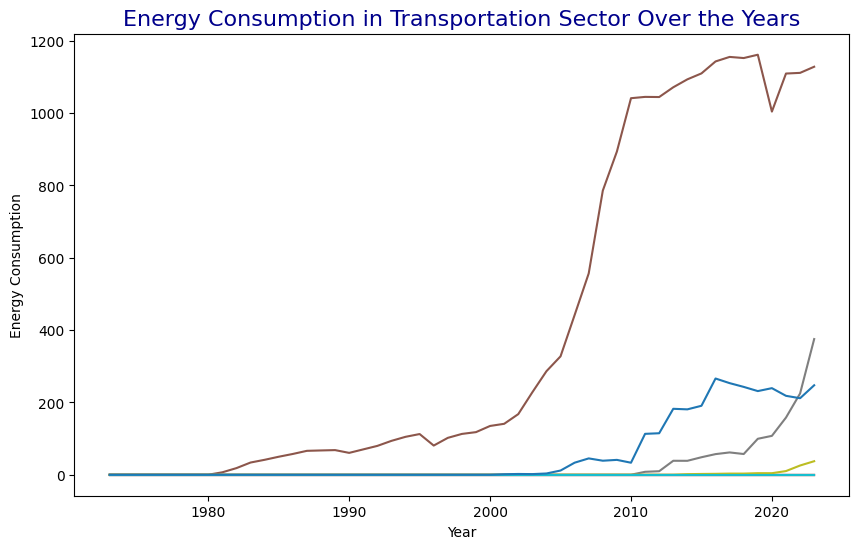

In [23]:
# Let's analyze how different sectors have consumed various energy types over the years.
# This will help us understand the trends and shifts in energy usage within each sector.

for sector in sectors:
    # Filter the data for the current sector
    df_sec = df[df['Sector'] == sector]
    
    # Group the data by Year and sum up the energy consumption for all types
    df_sec = df_sec.groupby('Year')[cols].sum().reset_index()
    
    # Plotting the energy consumption trends over the years for this sector
    plt.figure(figsize=(10, 6))
    for energy_type in cols:
        plt.plot(df_sec['Year'], df_sec[energy_type], label=energy_type)
    
    # Setting the title and labels to make the plot more informative
    plt.title(f"Energy Consumption in {sector} Sector Over the Years", fontsize=16, color='darkblue')
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    
    # Adding a legend to show which line represents which


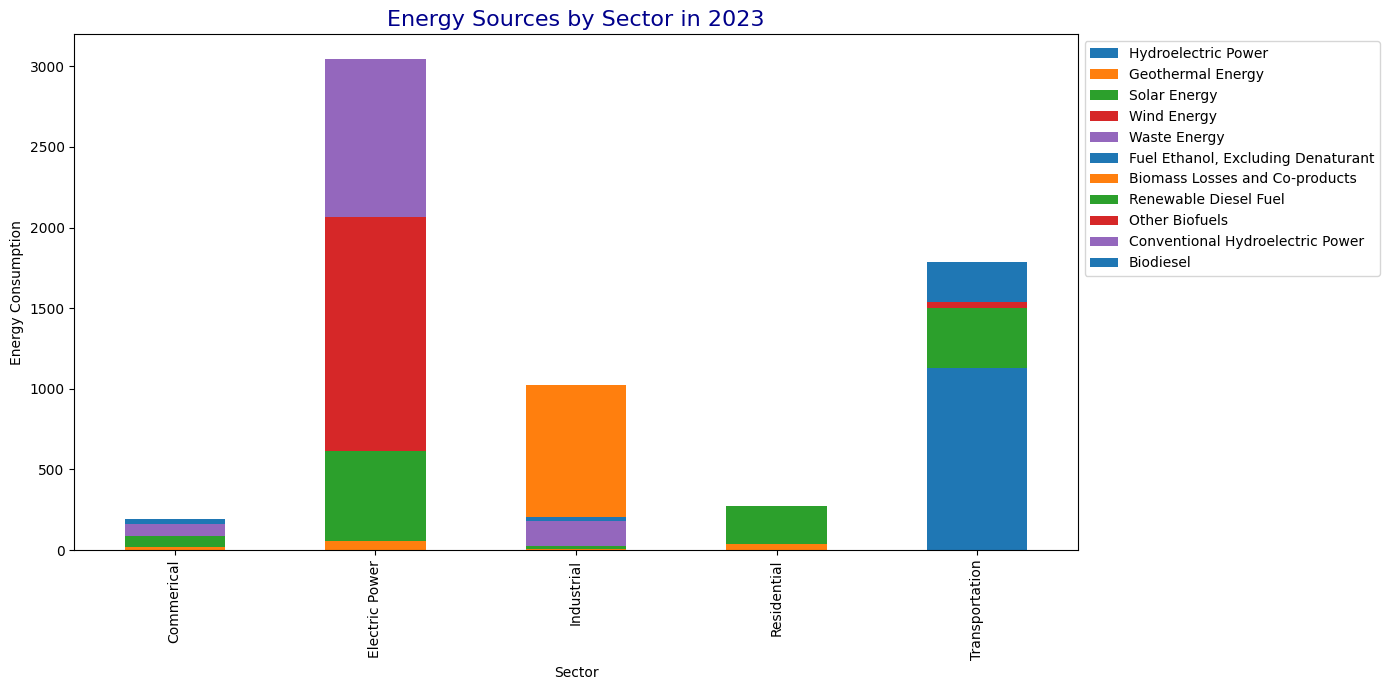

In [24]:
# Let's examine the energy consumption breakdown by sector for the year 2023.
# This will show us the distribution of different energy types across sectors in the most recent complete year.

# Filtering the data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Aggregating the consumption for each sector
df_sector_2023 = df_2023.groupby('Sector')[cols].sum().reset_index()

# Plotting a stacked bar chart to visualize the energy mix within each sector
df_sector_2023.set_index('Sector')[cols].plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)

# Customizing the plot with titles and labels
plt.xlabel('Sector')
plt.ylabel('Energy Consumption')
plt.title('Energy Sources by Sector in 2023', fontsize=16, color='darkblue')

# Adding a legend and adjusting layout
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Display the plot
plt.show()


In [25]:
# Now, let's create a new column that sums up all energy types to represent the total energy consumed.
# This will allow us to analyze the overall energy consumption across sectors.

# Summing up the energy types to create a total energy column
df['Total_Energy'] = df[cols].sum(axis=1)

# Grouping the data by sector and summing the total energy for each sector
df_sectors = df.groupby('Sector')['Total_Energy'].sum().reset_index()

# Creating a pie chart to visualize the proportion of total energy consumption by sector
fig = px.pie(df_sectors, names='Sector', values='Total_Energy', color='Sector',
             color_discrete_sequence=colors, title='Total Energy Consumption by Sector')

# Display the interactive pie chart
fig.show()


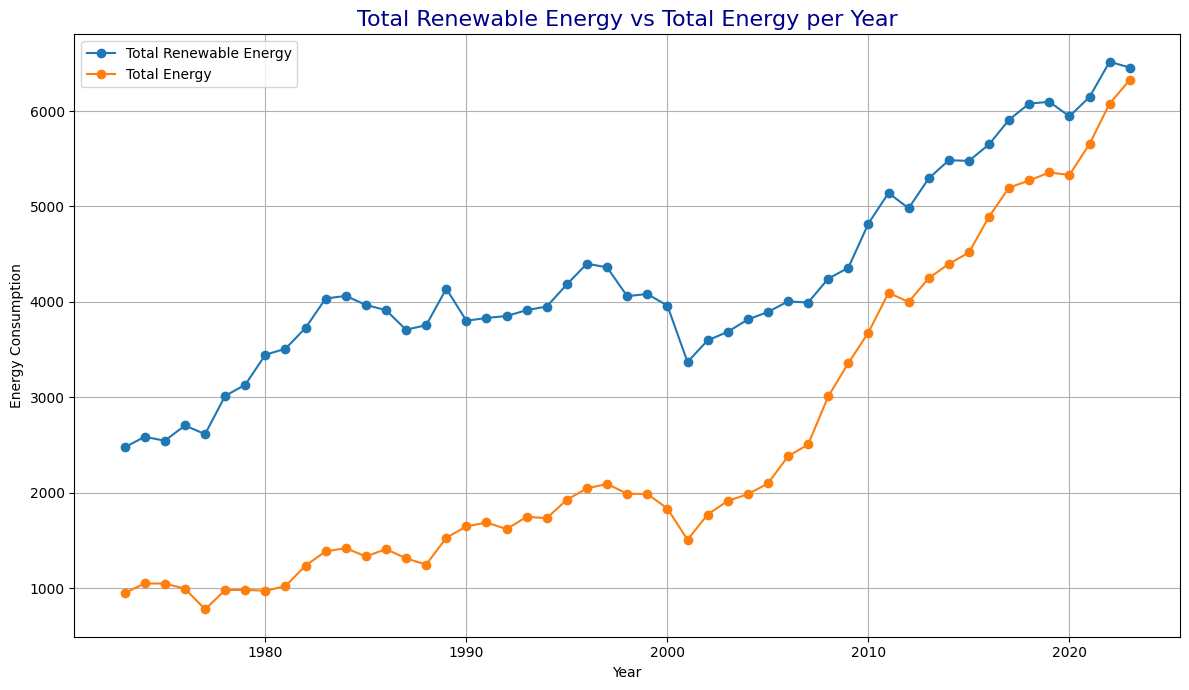

In [26]:
# Let's compare the total renewable energy consumption with the total energy consumption over the years.
# This will help us see if renewable energy is becoming a larger part of the overall energy mix.

# Grouping data by Year and summing up the total and renewable energy
df_tot_ren = df.groupby('Year')[['Total Renewable Energy', 'Total_Energy']].sum().reset_index()

# Plotting both total renewable energy and total energy on the same graph to compare their trends
plt.figure(figsize=(12, 7))
plt.plot(df_tot_ren['Year'], df_tot_ren['Total Renewable Energy'], label='Total Renewable Energy', marker='o')
plt.plot(df_tot_ren['Year'], df_tot_ren['Total_Energy'], label='Total Energy', marker='o')

# Customizing the plot with titles, labels, and a legend
plt.title("Total Renewable Energy vs Total Energy per Year", fontsize=16, color='darkblue')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')

# Adding a legend and enabling the grid
plt.legend()
plt.grid(True)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


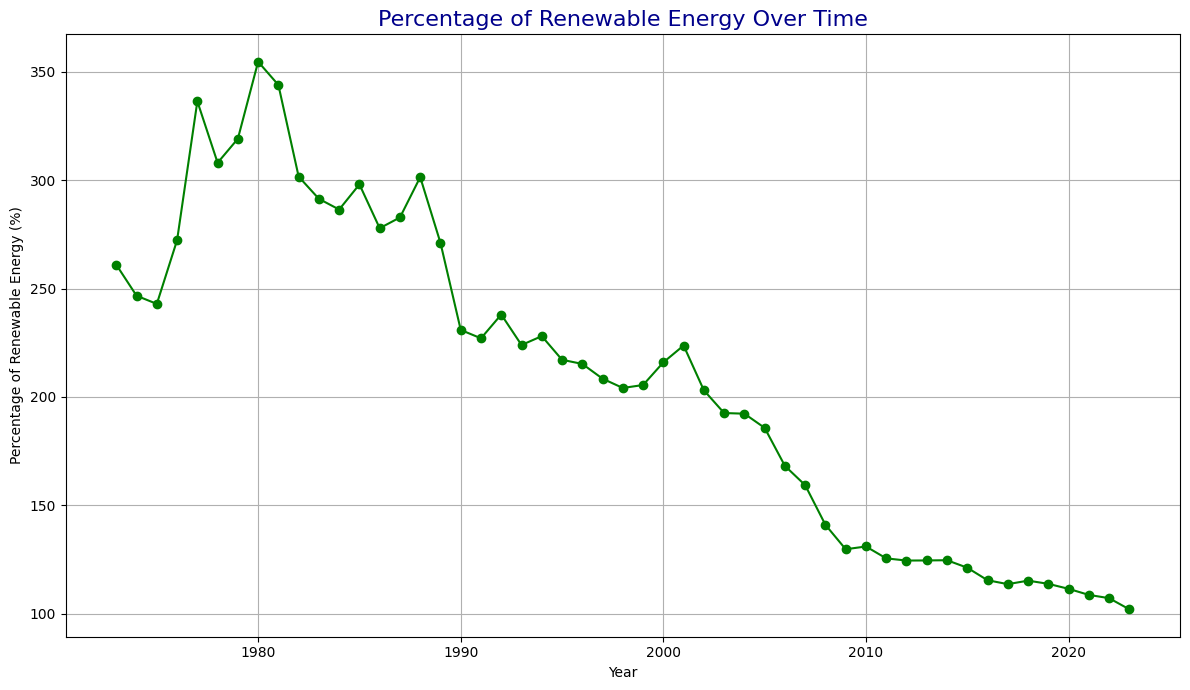

In [27]:
# Finally, let's calculate the percentage of total energy that comes from renewable sources each year.
# This will show us the progress of renewable energy adoption over time.

# Calculating the percentage of renewable energy relative to total energy
df_tot_ren['% Renewable Energy'] = (df_tot_ren['Total Renewable Energy'] / df_tot_ren['Total_Energy']) * 100

# Handling any potential missing data by filling NaN values with 0
df_tot_ren = df_tot_ren.fillna(0)

# Plotting the percentage of renewable energy over the years
plt.figure(figsize=(12, 7))
plt.plot(df_tot_ren['Year'], df_tot_ren['% Renewable Energy'], marker='o', color='green')

# Customizing the plot with titles and labels
plt.title('Percentage of Renewable Energy Over Time', fontsize=16, color='darkblue')
plt.xlabel('Year')
plt.ylabel('Percentage of Renewable Energy (%)')

# Enabling the grid and adjusting the layout
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
